In [6]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%autoreload 2

In [8]:
cd ..

/home/idies/workspace/Storage/lianmign/persistent/UCA_Coding_Test


In [9]:
import sys
# sys.path.append(r'C:\Users\Sommer Lab\Documents\Analysis Code')
import os
from scipy.optimize import curve_fit
from scipy.ndimage import rotate
from scipy.integrate import simpson

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from ImageAnalysis import ImageAnalysisCode

import glob


In [10]:
pwd

'/home/idies/workspace/Storage/lianmign/persistent/UCA_Coding_Test'

### Creating Variable Logs and Pandas

In [6]:
data_folder = r'Z:\ats317group\Data\2023\11-2023\30 Nov 2023\Variable Logs'

In [7]:
filenames = os.listdir(data_folder)

In [8]:
filenames.sort()

In [9]:
parameter_list = []

for filename in filenames:
    parameter_dict = {}
    parameter_dict['time'] = datetime.datetime.strptime(filename.rsplit('_', 1)[0],'Variables_%Y_%m_%d_%H_%M_%S')
#     print(parameter_dict['time'])
    with open( data_folder + '/' + filename) as f:
        next(f)
        for line in f:
            key, val = line.strip().split(' = ')
            parameter_dict[key.replace(' ', '_')] = float(val)
            
    parameter_list.append(parameter_dict)

In [10]:
print(parameter_dict['time'])

2023-12-01 11:47:57


In [11]:
parameter_dict

{'time': datetime.datetime(2023, 12, 1, 11, 47, 57),
 'IterationNum': 0.0,
 'IterationCount': 45.0,
 'wait': 2.0,
 'AndorROIheight': 512.0,
 'AndorShortExpDelay_us': 2415.44,
 'LFImg': 3.598,
 'LF_AOM_freq': 226.0,
 'time_compress': 5.0,
 'MOT_Re_Attn_final_V': 2.5,
 'TOF': 0.0,
 'IR_1': 0.0,
 'tmod_ms': 0.0,
 'fmod_kHz': 0.0,
 'cMOT_coil': 0.2,
 'cMOT_dwell_ms': 0.1,
 'ZSBiasCurrent': 6.0,
 'CamBiasCurrent': 0.0,
 'VerticalBiasCurrent': 1.5,
 'ZSBiasVoltage': 1.44,
 'CamBiasVoltage': 0.322,
 'VerticalBiasVoltage': 0.6485,
 'HighServo1': 2.3,
 'LowServo1': 0.0,
 'D1Time_ms': 1.5,
 'ODT_Position': 1200.0,
 'MOT_VCO': 5.5,
 'LFImg_Atten': 4.0,
 'cMOT_final_V': 7.5,
 'D1_AOM_VCO': 9.15,
 'D1_Re_Attn': 5.75,
 'D1_AOM_Attn': 10.0,
 'D1_Re_Attn_rampFinal': 5.75,
 'HighServo2': 2.3,
 'HighServo3': 2.3,
 'HighServo0': -0.1,
 'Coil_medB': -0.1,
 'MedB_time': 20.0,
 'IR_AOM_freq': 110.0,
 'IR_AOM_VCO_V': 7.80068728522337,
 'IRmodulate_ms': 7.0,
 'modulate_freq': 30.0,
 'Burnt_In': 1.0}

In [12]:
df = pd.DataFrame(parameter_list).set_index('time')
df

,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time_compress,MOT_Re_Attn_final_V,TOF,...,HighServo2,HighServo3,HighServo0,Coil_medB,MedB_time,IR_AOM_freq,IR_AOM_VCO_V,IRmodulate_ms,modulate_freq,Burnt_In
time,,,,,,,,,,,,,,,,,,,,,
2023-11-30 11:33:19,0.0,20.0,30.0,512.0,2415.44,3.598,226.0,5.0,2.5,0.0,...,2.3,2.3,-0.1,-0.1,20.0,110.0,7.800687,7.0,20.0,NaN
2023-11-30 15:17:33,0.0,20.0,30.0,512.0,2415.44,3.598,226.0,5.0,2.5,0.0,...,2.3,2.3,-0.1,-0.1,20.0,110.0,7.800687,7.0,30.0,NaN
2023-11-30 15:18:58,0.0,1.0,30.0,512.0,2415.44,3.598,226.0,5.0,2.5,0.0,...,2.3,2.3,-0.1,-0.1,20.0,110.0,7.800687,7.0,30.0,NaN
2023-11-30 15:19:52,0.0,1.0,30.0,512.0,2415.44,3.598,226.0,5.0,2.5,0.0,...,2.3,2.3,-0.1,-0.1,20.0,110.0,7.800687,7.0,30.0,NaN
2023-11-30 15:31:09,0.0,25.0,30.0,512.0,2415.44,3.598,226.0,5.0,2.5,0.0,...,2.3,2.3,-0.1,-0.1,20.0,110.0,7.800687,7.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30 18:57:00,41.0,45.0,2.0,512.0,2415.44,3.598,226.0,5.0,2.5,0.0,...,2.3,2.3,-0.1,-0.1,20.0,110.0,7.800687,7.0,30.0,1.0
2023-11-30 18:57:12,42.0,45.0,2.0,512.0,2415.44,3.598,226.0,5.0,2.5,0.0,...,2.3,2.3,-0.1,-0.1,20.0,110.0,7.800687,7.0,30.0,1.0
2023-11-30 18:57:24,43.0,45.0,2.0,512.0,2415.44,3.598,226.0,5.0,2.5,0.0,...,2.3,2.3,-0.1,-0.1,20.0,110.0,7.800687,7.0,30.0,1.0


In [13]:
aa = df.head()[['IterationNum', 'wait', 'VerticalBiasVoltage']]
aa

,IterationNum,wait,VerticalBiasVoltage
time,,,
2023-11-30 11:33:19,0.0,30.0,0.377
2023-11-30 15:17:33,0.0,30.0,0.377
2023-11-30 15:18:58,0.0,30.0,0.377
2023-11-30 15:19:52,0.0,30.0,0.920
2023-11-30 15:31:09,0.0,30.0,0.739


In [12]:
bb = df.iloc[0:14][['IterationNum', 'wait', 'VerticalBiasCurrent', 'Burnt_In']]
bb

,IterationNum,wait,VerticalBiasCurrent,Burnt_In
time,,,,
2023-11-30 11:33:19,0.0,30.0,0.0,NaN
2023-11-30 15:17:33,0.0,30.0,0.0,NaN
2023-11-30 15:18:58,0.0,30.0,0.0,NaN
2023-11-30 15:19:52,0.0,30.0,3.0,NaN
2023-11-30 15:31:09,0.0,30.0,2.0,0.0
2023-11-30 15:31:15,1.0,30.0,2.5,0.0
2023-11-30 15:31:22,2.0,30.0,3.0,0.0
2023-11-30 15:31:28,3.0,30.0,3.5,0.0
2023-11-30 15:31:34,4.0,30.0,4.0,0.0


In [18]:
bb.groupby(['IterationNum', 'VerticalBiasCurrent']).mean()

wait  Burnt_In
IterationNum VerticalBiasCurrent                
0.0          0.0                  30.0       NaN
             2.0                  30.0       0.0
             3.0                  30.0       NaN
1.0          2.5                  30.0       0.0
2.0          3.0                  30.0       0.0
3.0          3.5                  30.0       0.0
4.0          4.0                  30.0       0.0
5.0          2.0                  30.0       0.0
6.0          2.5                  30.0       0.0
7.0          3.0                  30.0       0.0
8.0          3.5                  30.0       0.0
9.0          4.0                  30.0       0.0

In [20]:
cc = bb.groupby(['IterationNum', 'VerticalBiasCurrent']).mean().wait.unstack()
cc

VerticalBiasCurrent,0.0,2.0,2.5,3.0,3.5,4.0
IterationNum,,,,,,
0.0,30.0,30.0,NaN,30.0,NaN,NaN
1.0,NaN,NaN,30.0,NaN,NaN,NaN
2.0,NaN,NaN,NaN,30.0,NaN,NaN
3.0,NaN,NaN,NaN,NaN,30.0,NaN
4.0,NaN,NaN,NaN,NaN,NaN,30.0
5.0,NaN,30.0,NaN,NaN,NaN,NaN
6.0,NaN,NaN,30.0,NaN,NaN,NaN
7.0,NaN,NaN,NaN,30.0,NaN,NaN
8.0,NaN,NaN,NaN,NaN,30.0,NaN


In [21]:
cc.index

Float64Index([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], dtype='float64', name='IterationNum')

In [26]:
cc.columns.values

array([0. , 2. , 2.5, 3. , 3.5, 4. ])

In [25]:
cc.values

array([[30., 30., nan, 30., nan, nan],
       [nan, nan, 30., nan, nan, nan],
       [nan, nan, nan, 30., nan, nan],
       [nan, nan, nan, nan, 30., nan],
       [nan, nan, nan, nan, nan, 30.],
       [nan, 30., nan, nan, nan, nan],
       [nan, nan, 30., nan, nan, nan],
       [nan, nan, nan, 30., nan, nan],
       [nan, nan, nan, nan, 30., nan],
       [nan, nan, nan, nan, nan, 30.]])

In [38]:
bb.groupby('IterationNum').mean()

,wait,VerticalBiasCurrent,Burnt_In
IterationNum,,,
0.0,30.0,1.0,0.0
1.0,30.0,2.5,0.0
2.0,30.0,3.0,0.0
3.0,30.0,3.5,0.0
4.0,30.0,4.0,0.0
5.0,30.0,2.0,0.0
6.0,30.0,2.5,0.0
7.0,30.0,3.0,0.0
8.0,30.0,3.5,0.0


<ErrorbarContainer object of 3 artists>

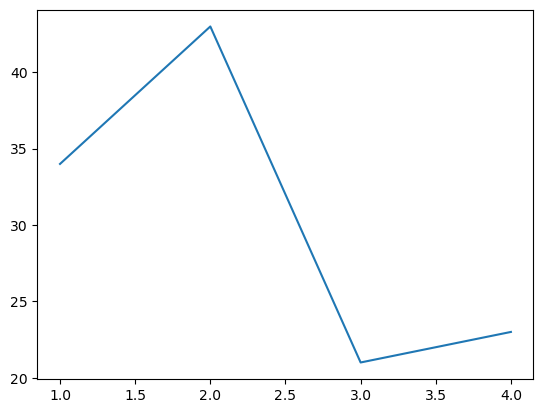

In [46]:
plt.errorbar([1,2,3,4], [34,43,21,23], [0]*4)

In [35]:
bb.groupby('IterationNum').std(ddof=1)

,wait,VerticalBiasCurrent,Burnt_In
IterationNum,,,
0.0,NaN,NaN,NaN
1.0,NaN,NaN,NaN
2.0,NaN,NaN,NaN
3.0,NaN,NaN,NaN
4.0,NaN,NaN,NaN
5.0,NaN,NaN,NaN
6.0,NaN,NaN,NaN
7.0,NaN,NaN,NaN
8.0,NaN,NaN,NaN


In [6]:
take_smaller = lambda s1, s2: s1 if s1.sum() < s2.sum() else s2
aa.combine(bb, take_smaller)

NameError: name 'aa' is not defined

In [255]:
aa.merge(bb, 'outer')

,IterationNum,wait,VerticalBiasVoltage,FLIR_Pulse,piezoX,High_PD_1
0,3.14,0.0,0.3770,NaN,5.0,1.75
1,3.14,0.0,0.3770,NaN,5.0,1.75
2,3.14,0.0,0.3770,NaN,5.0,1.75
3,3.14,0.0,0.3770,NaN,5.0,1.75
4,3.14,0.0,0.3770,NaN,5.0,1.75
5,0.00,0.0,0.3770,NaN,5.0,1.75
6,0.00,0.0,0.3770,NaN,5.0,1.75
7,0.00,0.0,0.3770,NaN,5.0,1.75
8,0.00,0.0,0.3770,NaN,5.0,1.75
9,0.00,0.0,0.3770,NaN,5.0,1.75


In [250]:
cc = bb.join(bb, how='outer', lsuffix='_new')
cc

,piezoX_new,High_PD_1_new,piezoX,High_PD_1
time,,,,
2023-09-15 14:25:48,5.0,1.75,5.0,1.75
2023-09-15 14:25:55,5.0,1.75,5.0,1.75
2023-09-15 14:26:01,5.0,1.75,5.0,1.75
2023-09-15 14:26:08,5.0,1.75,5.0,1.75
2023-09-15 14:26:15,5.0,1.75,5.0,1.75


In [251]:
bb.join(cc, how='outer', lsuffix='_new')

,piezoX_new,High_PD_1_new,piezoX_new,High_PD_1_new,piezoX,High_PD_1
time,,,,,,
2023-09-15 14:25:48,5.0,1.75,5.0,1.75,5.0,1.75
2023-09-15 14:25:55,5.0,1.75,5.0,1.75,5.0,1.75
2023-09-15 14:26:01,5.0,1.75,5.0,1.75,5.0,1.75
2023-09-15 14:26:08,5.0,1.75,5.0,1.75,5.0,1.75
2023-09-15 14:26:15,5.0,1.75,5.0,1.75,5.0,1.75


In [106]:
aa.index.set_names('', inplace=True)

In [107]:
aa

,IterationNum,wait,VerticalBiasVoltage,FLIR_Pulse
,,,,
2023-09-15 14:24:20,3.14,0.0,0.3770,NaN
2023-09-15 14:25:41,0.00,0.0,0.3770,NaN
2023-09-15 14:25:48,1.00,0.0,0.4675,NaN
2023-09-15 14:25:55,2.00,0.0,0.5580,NaN
2023-09-15 14:26:01,3.00,0.0,0.6485,NaN


In [68]:
aa.iloc[0:4]

,IterationNum,wait,VerticalBiasVoltage,FLIR_Pulse
time,,,,
2023-09-15 14:24:20,3.14,0.0,0.3770,NaN
2023-09-15 14:25:41,0.00,0.0,0.3770,NaN
2023-09-15 14:25:48,1.00,0.0,0.4675,NaN
2023-09-15 14:25:55,2.00,0.0,0.5580,NaN


In [69]:
aa[0:4]

,IterationNum,wait,VerticalBiasVoltage,FLIR_Pulse
time,,,,
2023-09-15 14:24:20,3.14,0.0,0.3770,NaN
2023-09-15 14:25:41,0.00,0.0,0.3770,NaN
2023-09-15 14:25:48,1.00,0.0,0.4675,NaN
2023-09-15 14:25:55,2.00,0.0,0.5580,NaN


In [70]:
pd.DataFrame({'a': [1, 2, 3, 4]})

,a
0,1
1,2
2,3
3,4


In [36]:
parameter_Frame[parameter_Frame.time < datetime.datetime(2023, 9, 15, 18, 14, 8, 764070)]

,time,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time_compress,MOT/Re_Attn_final_V,...,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High_PD_1,High_PD_2,Evap_Time,Evap_Time_2,FLIR_Pulse
0,2023-09-15 14:24:20,0.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
1,2023-09-15 14:25:41,0.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2,2023-09-15 14:25:48,1.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.4675,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
3,2023-09-15 14:25:55,2.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.5580,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
4,2023-09-15 14:26:01,3.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.6485,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2023-09-15 18:10:01,16.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,16.0
82,2023-09-15 18:10:07,17.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,17.0
83,2023-09-15 18:10:14,18.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,18.0
84,2023-09-15 18:10:21,19.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,19.0


In [29]:
Series = parameter_Frame[parameter_Frame.time < datetime.datetime(2023, 9, 15, 18, 14, 8, 764070)].iloc[-1]

In [30]:
Series.name

85

In [242]:
text = Series[['cMOT coil', 'VerticalBiasCurrent']]

Text(0.03, 0.98, 'cMOT coil              0.2\nVerticalBiasCurrent    1.0')

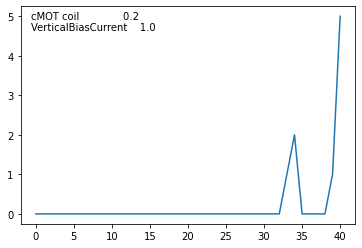

In [265]:
fig, ax = plt.subplots(1,1)

ax.plot(parameter_Frame.VerticalBiasCurrent)
ax.text(0.03,0.98, text.to_string(), ha='left', va='top', transform=ax.transAxes)

In [37]:
parameter_Frame.set_index('time')

,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time_compress,MOT/Re_Attn_final_V,TOF,...,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High_PD_1,High_PD_2,Evap_Time,Evap_Time_2,FLIR_Pulse
time,,,,,,,,,,,,,,,,,,,,,
2023-09-15 14:24:20,0.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:41,0.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:48,1.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.4675,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:55,2.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.5580,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:26:01,3.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.6485,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-15 20:13:17,16.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,16.0
2023-09-15 20:13:24,17.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,17.0
2023-09-15 20:13:30,18.0,21.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,97.0,50.0,18.0


In [39]:
parameter_Frame.query('time <= datetime.datetime(2023, 9, 15, 16, 50, 46)')

,time,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time_compress,MOT/Re_Attn_final_V,...,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High_PD_1,High_PD_2,Evap_Time,Evap_Time_2,FLIR_Pulse
0,2023-09-15 14:24:20,0.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
1,2023-09-15 14:25:41,0.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2,2023-09-15 14:25:48,1.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.4675,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
3,2023-09-15 14:25:55,2.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.5580,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
4,2023-09-15 14:26:01,3.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.6485,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
5,2023-09-15 14:26:08,4.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.7390,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
6,2023-09-15 14:26:15,5.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.8295,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
7,2023-09-15 14:26:21,6.0,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.9200,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
8,2023-09-15 14:40:24,0.0,6.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
9,2023-09-15 14:40:30,1.0,6.0,1.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN


In [191]:
parameter_Frame.time <= datetime.datetime(2023, 9, 8, 16, 50, 46)

0      True
1      True
2      True
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
Name: time, dtype: bool

In [65]:
def extractParameter(parameterName):
    return [ii[parameterName] for ii in parameter_list]

In [70]:
cMOTCoil = extractParameter('cMOT coil')
cMOTDwell_ms = extractParameter('cMOT dwell_ms')
ZSBiasI = extractParameter('ZSBiasCurrent')
CamBiasI = extractParameter('CamBiasCurrent')
VerticalBiasI = extractParameter('VerticalBiasCurrent')
ZSBiasV = extractParameter('ZSBiasVoltage')
CamBiasV = extractParameter('CamBiasVoltage')
VerticalBiasV = extractParameter('VerticalBiasVoltage')

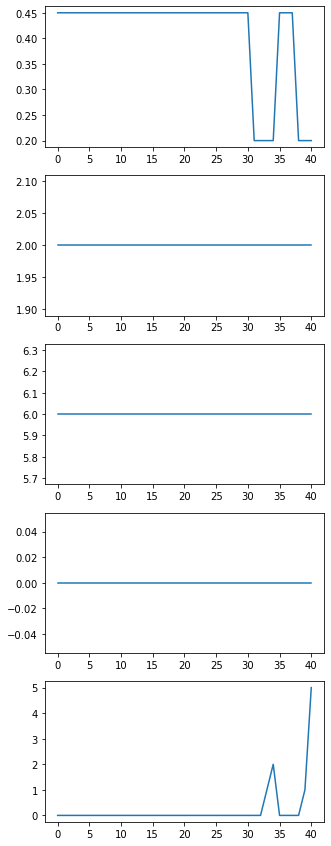

In [77]:
fig, axes = plt.subplots(5, 1, figsize=(5,15))

axes[0].plot(cMOTCoil)
axes[1].plot(cMOTDwell_ms)
axes[2].plot(ZSBiasI)
axes[3].plot(CamBiasI)
axes[4].plot(VerticalBiasI)
# axes[5].plot(ZSBiasV)
# axes[6].plot(CamBiasV)
# axes[7].plot(VerticalBiasV)

In [45]:
d = {}
with open("Variables_2023_09_12_13_58_15_0.txt") as f:
    next(f)
    for line in f:
        key, val = line.strip().split(' = ')
        d[key] = float(val)

In [79]:
d

{'IterationNum': 0.0,
 'IterationCount': 1.0,
 'wait': 0.0,
 'AndorROIheight': 512.0,
 'AndorShortExpDelay_us': 2415.44,
 'LFImg': 3.598,
 'LF_AOM_freq': 226.0,
 'time compress': 5.0,
 'MOT/Re Attn final V': 4.0,
 'TOF': 0.0,
 'IR_1': 0.0,
 'tmod_ms': 0.0,
 'fmod_kHz': 0.0,
 'cMOT coil': 0.2,
 'cMOT dwell_ms': 2.0,
 'ZSBiasCurrent': 6.0,
 'CamBiasCurrent': 0.0,
 'VerticalBiasCurrent': 5.0,
 'ZSBiasVoltage': 1.44,
 'CamBiasVoltage': 0.322,
 'VerticalBiasVoltage': 1.282,
 'piezoX': 5.0,
 'piezoY': 5.0,
 'D1Time_ms': 1.5,
 'High PD 1': 1.75,
 'High PD 2': 0.25,
 'Evap Time': 100.0,
 'Evap Time 2': 50.0}

In [83]:
type(parameter_Frame)

pandas.core.frame.DataFrame

<AxesSubplot:>

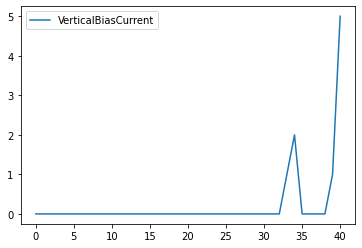

In [91]:
parameter_Frame.VerticalBiasCurrent.plot(legend=1)

<AxesSubplot:xlabel='time'>

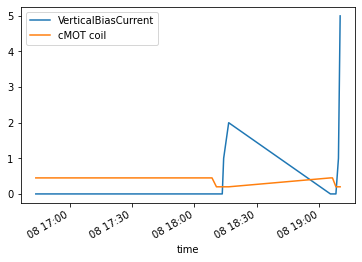

In [204]:
parameter_Frame.plot('time', ['VerticalBiasCurrent', 'cMOT coil'])

In [206]:
parameter_Frame.VerticalBiasCurrent

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    1.0
34    2.0
35    0.0
36    0.0
37    0.0
38    0.0
39    1.0
40    5.0
Name: VerticalBiasCurrent, dtype: float64

<AxesSubplot:>

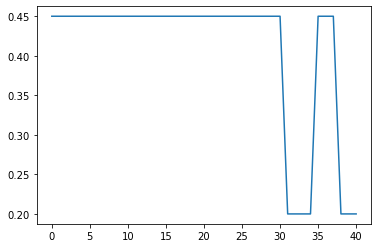

In [198]:
parameter_Frame['cMOT coil'].plot()

In [93]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [19]:
mydict = {1:1, 2:3, 5:65}

In [23]:
mydict[5]

65

In [24]:
with open('myfile.txt', 'w') as f:
    print(mydict, file=f)


In [207]:
time.tim(os.path.getctime(r'Z:\ats317group\Data\2023\09-2023\08 Sep 2023\Andor\move cMOT\5000000000spool.dat'))

1694211248.7640698

In [214]:
datetime.datetime.fromtimestamp(1694211248.7640698)

datetime.datetime(2023, 9, 8, 18, 14, 8, 764070)

In [376]:
pd.Timestamp(1694211248.7640698, unit='s')

Timestamp('2023-09-08 22:14:08.764069796')

### Class

In [86]:
class Complex():
    def __init__(self, realpart=1, imagpart=3):
        # self = a
        self.r = realpart
        self.i = imagpart

In [87]:
x = Complex(3.0, -4.5)
print(x.r, x.i)   # 输出结果：3.0 -4.5

3.0 -4.5


In [83]:
x = Complex()
print(x.r, x.i)   # 输出结果：3.0 -4.5

1 3


In [ ]:
class CodeRunningParameters():
    
    def __init__(self, 
                 subtract_burntin=0, skip_first_img='auto',
                 rotate_angle, 
    
    

In [1]:
runParams = {
    'subtract_burntin': [0, 0],
    'skip_first_img': ['auto', 0],
    'rotate_angle': [0, 0], #rotates ccw
    'ROI': [ [10, -10, 10, -10],
             [10, -10, 10, -10] ], # rowStart, rowEnd, colStart, colEnd
    
    'subtract_bg': [0, 0], 
    'signal_feature': ['wide', 'wide'], 
    'signal_width': [10, 10], # The narrower the signal, the bigger the number.
    'fitbgDeg': [5, 5],
    
    'optical_path': ['side', 'top']
}

In [67]:
class people:
    #定义基本属性
    name = b''
    age = 0
    #定义私有属性,私有属性在类外部无法直接进行访问
    __weight = 0
    #定义构造方法
    def __init__(self,n,a,w):
        self.name = n
        self.age = a
        self.__weight = w
    def speak(self):
        print("%s 说: 我 %d 岁。" %(self.name,self.age))

In [68]:
p = people(b'runoob',10,30)

In [69]:
p.name

b'runoob'

In [70]:
pp = people(b'asdf',10,30)

In [71]:
pp.name

b'asdf'

In [66]:
p.name

'runoob'

### Dict and df for params

In [24]:
runParams = {
    'subtract_burntin': [0, 0],
    'skip_first_img': ['auto', 0],
    'rotate_angle': [0, 0], #rotates ccw
    'ROI': [
        # [10, -10, 10, -10],
        [300, 430, 650, 1000],
        [10, -10, 10, -10]
    ], # rowStart, rowEnd, colStart, colEnd
    
    'subtract_bg': [1, 0], 
    'y_feature': ['narrow', 'narrow'], 
    'x_feature': ['wide', 'wide'], 
    'y_peak_width': [10, 10], # The narrower the signal, the bigger the number.
    'x_peak_width': [10, 10], # The narrower the signal, the bigger the number.
    'fitbgDeg': [5, 5],
    
    'optical_path': ['side', 'top']
}

In [25]:
date = '11/7/2024'

params_zyl = ImageAnalysisCode.ExperimentParams(date, axis=runParams['optical_path'][0], cam_type = "zyla")
params_cha = ImageAnalysisCode.ExperimentParams(date, axis=runParams['optical_path'][1], cam_type = "chameleon")
runParams['expmntParams'] = [params_zyl, params_cha]
runParams['dx_micron'] = np.vectorize( lambda a : a.camera.pixelsize_microns / a.magnification)(runParams['expmntParams'])

In [26]:
runParams = pd.DataFrame.from_dict(runParams, orient='index', columns=['zyl', 'cha'])

In [27]:
runParams

,zyl,cha
subtract_burntin,0,0
skip_first_img,auto,0
rotate_angle,0,0
ROI,"[300, 430, 650, 1000]","[10, -10, 10, -10]"
subtract_bg,1,0
y_feature,narrow,narrow
x_feature,wide,wide
y_peak_width,10,10
x_peak_width,10,10
fitbgDeg,5,5


In [19]:
runParams['zyl'].dx_micron

3.8461538461538463

In [53]:
# runParams.loc['dx_micron'] = 
runParams.loc['expmntParams'].apply( 
    lambda a : a.camera.pixelsize_microns / a.magnification)


zyl    3.846154
cha    6.250000
Name: expmntParams, dtype: float64

In [60]:
np.vectorize( lambda a : a.camera.pixelsize_microns / a.magnification)(runParams['expmntParams'])

array([3.84615385, 6.25      ])

In [40]:
params_zyl.camera.pixelsize_microns / params_zyl.magnification

3.8461538461538463

In [41]:
params_cha.camera.pixelsize_microns / params_cha.magnification

6.25

In [42]:
x = lambda a : a.camera.pixelsize_microns / a.magnification


In [43]:
x(runParams.zyl.expmntParams)

3.8461538461538463

In [44]:
def func(a):
    return a.camera.pixelsize_microns / a.magnification

In [45]:
func(runParams.zyl.expmntParams)

3.8461538461538463

In [48]:
( lambda a : a**2)(3)

9

In [3]:
runParams.fitbgDeg

AttributeError: 'dict' object has no attribute 'fitbgDeg'

In [11]:
df = pd.DataFrame.from_dict(runParams, orient='index', columns=['zyl', 'cha'])
df

,zyl,cha
subtract_burntin,0,0
skip_first_img,auto,0
rotate_angle,0,0
ROI,"[10, -10, 10, -10]","[10, -10, 10, -10]"
subtract_bg,0,0
signal_feature,wide,wide
signal_width,10,10
fitbgDeg,5,5
optical_path,side,top


In [12]:
df.loc['ROI']

zyl    [10, -10, 10, -10]
cha    [10, -10, 10, -10]
Name: ROI, dtype: object

In [15]:
df.loc['asdf'] = [11,33]

In [16]:
df

,zyl,cha
subtract_burntin,0,0
skip_first_img,auto,0
rotate_angle,0,0
ROI,"[10, -10, 10, -10]","[10, -10, 10, -10]"
subtract_bg,0,0
signal_feature,wide,wide
signal_width,10,10
fitbgDeg,5,5
optical_path,side,top
asdf,11,33


In [18]:
df

KeyError: 'asdf'

In [14]:
df.zyl.subtract_bg

0

In [15]:
df['zyl'].subtract_bg

0

In [16]:
df['zyl']['subtract_bg']

0

In [30]:
os.path.join('asdf','qwer', 'zxcv')

'asdf/qwer/zxcv'

In [23]:
os.path.join('asdf','../qwer')

'asdf/../qwer'

In [24]:
df

,zyl,cha
subtract_burntin,0,0
skip_first_img,auto,0
rotate_angle,0,0
ROI,"[10, -10, 10, -10]","[10, -10, 10, -10]"
subtract_bg,0,0
signal_feature,wide,wide
signal_width,10,10
fitbgDeg,5,5
optical_path,side,top


In [25]:
df.loc['optical_path']

zyl    side
cha     top
Name: optical_path, dtype: object

In [26]:
type(df.loc['optical_path'])

pandas.core.series.Series

In [28]:
df.loc['add'] = ['asdf','qwer']

In [29]:
df

,zyl,cha
subtract_burntin,0,0
skip_first_img,auto,0
rotate_angle,0,0
ROI,"[10, -10, 10, -10]","[10, -10, 10, -10]"
subtract_bg,0,0
signal_feature,wide,wide
signal_width,10,10
fitbgDeg,5,5
optical_path,side,top
add,asdf,qwer


### Vectorize

In [131]:
cameras = [
    'zyla',
    'chameleon'
]

date = '11/7/2024'

data_folder = [
    r'Andor/D1 temp',
    ]


In [132]:
runParams = {
    'subtract_burntin': [0, 0],
    'skip_first_img': ['auto', 0],
    'rotate_angle': [0, 0], #rotates ccw
    'ROI': [ [10, -10, 10, -10],
             [10, -10, 10, -10] ], # rowStart, rowEnd, colStart, colEnd
    
    'subtract_bg': [0, 0], 
    'signal_feature': ['wide', 'wide'], 
    'signal_width': [10, 10], # The narrower the signal, the bigger the number.
    'fitbgDeg': [5, 5],
    
    'optical_path': ['side', 'top']
}
runParams

{'subtract_burntin': [0, 0],
 'skip_first_img': ['auto', 0],
 'rotate_angle': [0, 0],
 'ROI': [[10, -10, 10, -10], [10, -10, 10, -10]],
 'subtract_bg': [0, 0],
 'signal_feature': ['wide', 'wide'],
 'signal_width': [10, 10],
 'fitbgDeg': [5, 5],
 'optical_path': ['side', 'top']}

In [134]:
runParams['expmntParams'] = np.vectorize(
    ImageAnalysisCode.ExperimentParams
)(
    date, axis=runParams['optical_path'], cam_type = cameras
)

In [135]:
runParams['dx_micron'] = np.vectorize(lambda a: a.camera.pixelsize_microns / a.magnification)(runParams['expmntParams'])

runParams = pd.DataFrame.from_dict(runParams, orient='index', columns=cameras)


In [120]:
runParams

,zyla,chameleon
subtract_burntin,0,0
skip_first_img,auto,0
rotate_angle,0,0
ROI,"[10, -10, 10, -10]","[10, -10, 10, -10]"
subtract_bg,0,0
signal_feature,wide,wide
signal_width,10,10
fitbgDeg,5,5
optical_path,side,top
expmntParams,<ImageAnalysis.ExperimentParameters.Experiment...,<ImageAnalysis.ExperimentParameters.Experiment...


In [137]:
runParams[cameras[0]]

subtract_burntin                                                    0
skip_first_img                                                   auto
rotate_angle                                                        0
ROI                                                [10, -10, 10, -10]
subtract_bg                                                         0
signal_feature                                                   wide
signal_width                                                       10
fitbgDeg                                                            5
optical_path                                                     side
expmntParams        <ImageAnalysis.ExperimentParameters.Experiment...
dx_micron                                                    3.846154
Name: zyla, dtype: object

In [138]:
runParams[cameras[0]].fit

3.8461538461538463

(<Figure size 640x480 with 6 Axes>,
 array([[<AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: >, <AxesSubplot: >]], dtype=object))

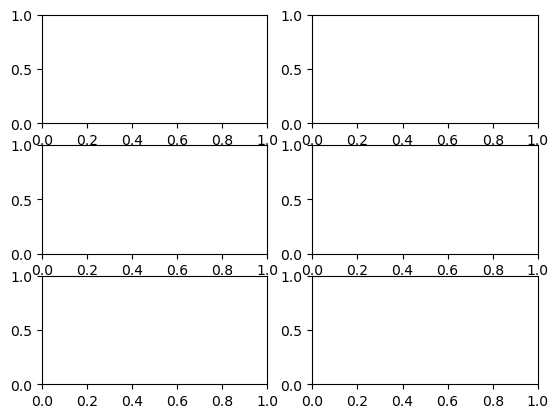

In [139]:
plt.subplots(3,2)

In [34]:
Dict1 = {
    'subtract_burntin': [0, 0],
    'skip_first_img': ['auto', 0],
    'rotate_angle': [0, 0], #rotates ccw
    'subtract_bg': 1}
Dict2 = {
    'skip_first_img': 99,
    'asdf':'qwer'}
    

In [37]:
Dict1

{'subtract_burntin': [0, 0],
 'skip_first_img': ['auto', 0],
 'rotate_angle': [0, 0],
 'subtract_bg': 1}

In [35]:
Dict1 | Dict2

{'subtract_burntin': [0, 0],
 'skip_first_img': 99,
 'rotate_angle': [0, 0],
 'subtract_bg': 1,
 'asdf': 'qwer'}

In [38]:
Dict1.update(Dict2)

In [39]:
Dict1

{'subtract_burntin': [0, 0],
 'skip_first_img': 99,
 'rotate_angle': [0, 0],
 'subtract_bg': 1,
 'asdf': 'qwer'}

### Plots

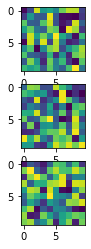

In [44]:
fig, axs = plt.subplots(3,1)

for ii in range(len(axs)):
    axs[ii].imshow(AA[ii])
#     plt.colorbar()
    
# plt.colorbar()

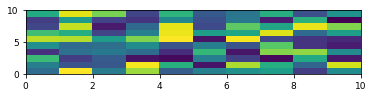

In [113]:
plt.subplot(3,1,1)
plt.pcolor(AA[0])

# plt.subplot(1,3,1)
# plt.pcolor(AA[1])

# plt.subplot(3,1,3)
# plt.pcolor(AA[2])

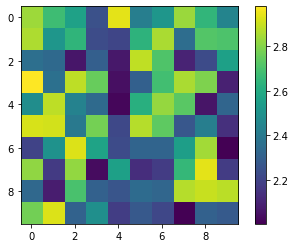

In [15]:
plt.imshow(AA[2])
plt.colorbar()

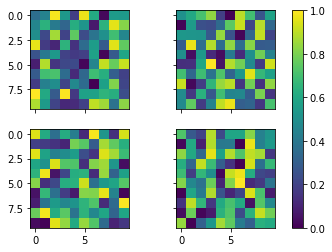

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
  
for ax in axes.flat:
    im = ax.imshow(np.random.random((10, 10)), vmin=0, vmax=1)
    
plt.colorbar(im, ax=axes.ravel().tolist())

In [23]:
axes.ravel().shape

(4,)

In [24]:
axes.flatten().shape

(4,)

In [26]:
ax=axes.ravel().tolist()

In [27]:
ax

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]

In [29]:
AA = np.random.rand(2,3)
AA

array([[0.97169886, 0.65668476, 0.02688219],
       [0.64657241, 0.02991465, 0.72120143]])

In [32]:
type(AA.flat)

numpy.flatiter

In [36]:
AA.flatten().shape

(6,)

In [37]:
AA.ravel().shape

(6,)

In [16]:
np.random.randint?

In [5]:
aa = np.random.randint(1,50,10)
bb = np.random.randint(1,50,10)

In [6]:
aa

array([39,  3,  2, 41, 46, 28,  1,  9, 20, 11])

In [11]:
aa.median()

AttributeError: 'numpy.ndarray' object has no attribute 'median'

In [7]:
bb

array([ 7, 35, 49,  8, 26,  9, 14, 25, 26,  4])

In [22]:
grid = np.meshgrid(aa, bb)

In [23]:
grid

[array([[44,  8, 16, 15],
        [44,  8, 16, 15],
        [44,  8, 16, 15],
        [44,  8, 16, 15]]),
 array([[22, 22, 22, 22],
        [36, 36, 36, 36],
        [43, 43, 43, 43],
        [30, 30, 30, 30]])]

In [24]:
grid[0].ravel()

array([44,  8, 16, 15, 44,  8, 16, 15, 44,  8, 16, 15, 44,  8, 16, 15])

In [26]:
np.vstack( (grid[0].ravel(), grid[1].ravel()) )

array([[44,  8, 16, 15, 44,  8, 16, 15, 44,  8, 16, 15, 44,  8, 16, 15],
       [22, 22, 22, 22, 36, 36, 36, 36, 43, 43, 43, 43, 30, 30, 30, 30]])

In [34]:
np.ones_like(grid[0], dtype=bool)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [42]:
mask = np.full(aa.shape, True)
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [43]:
mask[3:-3] = False

In [44]:
mask

array([ True,  True,  True, False, False, False, False,  True,  True,
        True])

In [52]:
pp = np.polyfit(aa, bb, 3)
pp

array([-4.22144870e-04,  2.38517060e-02,  1.27482701e-01,  1.12902784e+01])

In [53]:
xx = np.arange(aa.min(), aa.max(), 0.1)
yy = pp[0] * xx**3 + pp[1] * xx**2 + pp[2] * xx + pp[3]

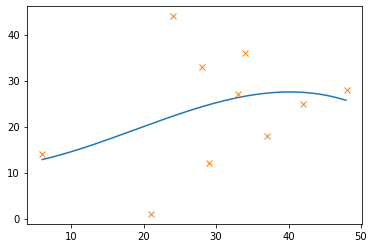

In [54]:
plt.plot(xx, yy, aa, bb, 'x')

### Variable Logs

In [284]:
def LoadVariableLog(path):
    filenames = os.listdir(path)
    filenames.sort()
    
    variable_list = []
    
    for filename in filenames:
        variable_dict = {}
        variable_dict['time'] = datetime.datetime.strptime(filename, 'Variables_%Y_%m_%d_%H_%M_%S_0.txt')
        # print(parameter_dict['time'])
        with open( path + '/' + filename) as f:
            next(f)
            for line in f:
                key, val = line.strip().split(' = ')
                variable_dict[key] = float(val)
                
        variable_list.append(variable_dict)
        
        return pd.DataFrame(variable_list)

In [285]:
LoadVariableLog(data_folder+'/Variable Logs')

,time,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time compress,MOT/Re Attn final V,...,ZSBiasVoltage,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High PD 1,High PD 2,Evap Time,Evap Time 2
0,2023-09-08 16:43:47,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0


In [269]:
aa = data_folder+'/Variable Logs'


In [272]:
bb = os.listdir(aa)

In [274]:
bb.sort()

In [275]:
bb

['Variables_2023_09_08_16_43_47_0.txt',
 'Variables_2023_09_08_16_45_48_0.txt',
 'Variables_2023_09_08_16_49_16_0.txt',
 'Variables_2023_09_08_16_50_46_0.txt',
 'Variables_2023_09_08_16_51_52_0.txt',
 'Variables_2023_09_08_17_05_57_0.txt',
 'Variables_2023_09_08_17_08_28_0.txt',
 'Variables_2023_09_08_17_09_58_0.txt',
 'Variables_2023_09_08_17_11_58_0.txt',
 'Variables_2023_09_08_17_13_10_0.txt',
 'Variables_2023_09_08_17_14_12_0.txt',
 'Variables_2023_09_08_17_15_05_0.txt',
 'Variables_2023_09_08_17_24_44_0.txt',
 'Variables_2023_09_08_17_24_51_0.txt',
 'Variables_2023_09_08_17_25_15_0.txt',
 'Variables_2023_09_08_17_25_22_0.txt',
 'Variables_2023_09_08_17_41_43_0.txt',
 'Variables_2023_09_08_17_42_45_0.txt',
 'Variables_2023_09_08_17_46_04_0.txt',
 'Variables_2023_09_08_17_46_11_0.txt',
 'Variables_2023_09_08_17_49_56_0.txt',
 'Variables_2023_09_08_17_50_03_0.txt',
 'Variables_2023_09_08_17_53_23_0.txt',
 'Variables_2023_09_08_17_53_30_0.txt',
 'Variables_2023_09_08_17_56_25_0.txt',


In [286]:
def LoadVariableLog(path):
    filenames = os.listdir(path)
    
    parameter_list = []

    for filename in filenames:
        parameter_dict = {}
        parameter_dict['time'] = datetime.datetime.strptime(filename,'Variables_%Y_%m_%d_%H_%M_%S_0.txt')
    #     print(parameter_dict['time'])
        with open( data_folder + '/Variable Logs/' + filename) as f:
            next(f)
            for line in f:
                key, val = line.strip().split(' = ')
                parameter_dict[key] = float(val)

        parameter_list.append(parameter_dict)
        
    return

In [288]:
LoadVariableLog(data_folder+'/Variable Logs')

In [293]:
os.path.join('a','b',None)

TypeError: join() argument must be str or bytes, not 'NoneType'

In [265]:
aa = parameter_Frame.head()
aa

,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time_compress,MOT/Re_Attn_final_V,TOF,...,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High_PD_1,High_PD_2,Evap_Time,Evap_Time_2,FLIR_Pulse
time,,,,,,,,,,,,,,,,,,,,,
2023-09-15 14:24:20,3.14,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:41,0.00,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.3770,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:48,1.00,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.4675,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:25:55,2.00,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.5580,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN
2023-09-15 14:26:01,3.00,7.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.0,...,0.322,0.6485,5.0,5.0,1.5,1.75,0.25,100.0,50.0,NaN


In [266]:
bb = aa.set_index('time')
bb

KeyError: "None of ['time'] are in the columns"

In [320]:
type(aa.iloc[0].time)

pandas._libs.tslibs.timestamps.Timestamp

In [42]:
bb.index[0]

Timestamp('2023-09-15 14:24:20')

In [43]:
bb.iloc[0]

IterationNum                0.000
IterationCount              7.000
wait                        0.000
AndorROIheight            512.000
AndorShortExpDelay_us    2415.440
LFImg                       3.598
LF_AOM_freq               226.000
time_compress               5.000
MOT/Re_Attn_final_V         4.000
TOF                         0.000
IR_1                        0.000
tmod_ms                     0.000
fmod_kHz                    0.000
cMOT_coil                   0.200
cMOT_dwell_ms               2.000
ZSBiasCurrent               6.000
CamBiasCurrent              0.000
VerticalBiasCurrent         0.000
ZSBiasVoltage               1.440
CamBiasVoltage              0.322
VerticalBiasVoltage         0.377
piezoX                      5.000
piezoY                      5.000
D1Time_ms                   1.500
High_PD_1                   1.750
High_PD_2                   0.250
Evap_Time                 100.000
Evap_Time_2                50.000
FLIR_Pulse                    NaN
Name: 2023-09-

In [50]:
bbb = bb.loc[datetime.datetime(2023, 9, 15, 14, 24, 20)]
bbb

IterationNum                0.000
IterationCount              7.000
wait                        0.000
AndorROIheight            512.000
AndorShortExpDelay_us    2415.440
LFImg                       3.598
LF_AOM_freq               226.000
time_compress               5.000
MOT/Re_Attn_final_V         4.000
TOF                         0.000
IR_1                        0.000
tmod_ms                     0.000
fmod_kHz                    0.000
cMOT_coil                   0.200
cMOT_dwell_ms               2.000
ZSBiasCurrent               6.000
CamBiasCurrent              0.000
VerticalBiasCurrent         0.000
ZSBiasVoltage               1.440
CamBiasVoltage              0.322
VerticalBiasVoltage         0.377
piezoX                      5.000
piezoY                      5.000
D1Time_ms                   1.500
High_PD_1                   1.750
High_PD_2                   0.250
Evap_Time                 100.000
Evap_Time_2                50.000
FLIR_Pulse                    NaN
Name: 2023-09-

### Timestamp

In [59]:
bbb.name - pd.Timestamp('2023-09-15 14:24:28')

Timedelta('-1 days +23:59:52')

In [64]:
bbb.name - datetime.datetime(2023, 9, 15, 14, 24, 28)

Timedelta('-1 days +23:59:52')

In [65]:
type(bbb.name - datetime.datetime(2023, 9, 15, 14, 24, 28))

pandas._libs.tslibs.timedeltas.Timedelta

In [69]:
(bbb.name - datetime.datetime(2023, 9, 15, 14, 24, 18)).total_seconds()

2.0

In [298]:
parameter_Frame.iloc[1]

time                     2023-09-08 16:45:48
IterationNum                             0.0
IterationCount                           1.0
wait                                     5.0
AndorROIheight                         512.0
AndorShortExpDelay_us                2415.44
LFImg                                  3.598
LF_AOM_freq                            226.0
time compress                            5.0
MOT/Re Attn final V                      4.0
TOF                                      0.0
IR_1                                     0.0
tmod_ms                                  0.0
fmod_kHz                                 0.0
cMOT coil                               0.45
cMOT dwell_ms                            2.0
ZSBiasCurrent                            6.0
CamBiasCurrent                           0.0
VerticalBiasCurrent                      0.0
ZSBiasVoltage                           1.44
CamBiasVoltage                         0.322
VerticalBiasVoltage                    0.377
piezoX    

In [326]:
filename

'Variables_2023_09_08_19_10_00_0.txt'

In [328]:
os.path.getctime(data_folder + '/Variable Logs/' + filename)

1694214600.6749604

In [352]:
datetime.datetime.fromtimestamp(1694191427)

datetime.datetime(2023, 9, 8, 12, 43, 47)

In [353]:
pd.Timestamp(1694191427, unit='s')

Timestamp('2023-09-08 16:43:47')

In [346]:
datetime.datetime.fromtimestamp(1694214600) == pd.Timestamp(1694214600, unit='s')

False

In [338]:
pd.Timestamp(os.path.getctime(data_folder + '/Variable Logs/' + filename), unit='s') == datetime.datetime(2023, 9, 8, 19, 10, 0, 674960)

False

In [350]:
bb.loc[pd.Timestamp('2023-09-08 16:43:47')]

IterationNum                0.000
IterationCount              1.000
wait                        5.000
AndorROIheight            512.000
AndorShortExpDelay_us    2415.440
LFImg                       3.598
LF_AOM_freq               226.000
time compress               5.000
MOT/Re Attn final V         4.000
TOF                         0.000
IR_1                        0.000
tmod_ms                     0.000
fmod_kHz                    0.000
cMOT coil                   0.450
cMOT dwell_ms               2.000
ZSBiasCurrent               6.000
CamBiasCurrent              0.000
VerticalBiasCurrent         0.000
ZSBiasVoltage               1.440
CamBiasVoltage              0.322
VerticalBiasVoltage         0.377
piezoX                      5.000
piezoY                      5.000
D1Time_ms                   1.500
High PD 1                   2.450
High PD 2                   0.250
Evap Time                 100.000
Evap Time 2                50.000
Name: 2023-09-08 16:43:47, dtype: float64

In [351]:
bb.loc[pd.Timestamp(1694191427, unit='s')]

IterationNum                0.000
IterationCount              1.000
wait                        5.000
AndorROIheight            512.000
AndorShortExpDelay_us    2415.440
LFImg                       3.598
LF_AOM_freq               226.000
time compress               5.000
MOT/Re Attn final V         4.000
TOF                         0.000
IR_1                        0.000
tmod_ms                     0.000
fmod_kHz                    0.000
cMOT coil                   0.450
cMOT dwell_ms               2.000
ZSBiasCurrent               6.000
CamBiasCurrent              0.000
VerticalBiasCurrent         0.000
ZSBiasVoltage               1.440
CamBiasVoltage              0.322
VerticalBiasVoltage         0.377
piezoX                      5.000
piezoY                      5.000
D1Time_ms                   1.500
High PD 1                   2.450
High PD 2                   0.250
Evap Time                 100.000
Evap Time 2                50.000
Name: 2023-09-08 16:43:47, dtype: float64

In [355]:
aa.time[0]

Timestamp('2023-09-08 16:43:47')

In [ ]:
1694205827 1694191427

In [364]:
aa.time[0] > datetime.datetime.fromtimestamp(1694191427)

True

In [358]:
aa.time[0]

Timestamp('2023-09-08 16:43:47')

In [375]:
datetime.datetime.fromtimestamp(1694191427)

datetime.datetime(2023, 9, 8, 12, 43, 47)

In [374]:
aa.time[0]

Timestamp('2023-09-08 16:43:47')

In [371]:
pd.Timestamp(1694191427, unit='s')

Timestamp('2023-09-08 16:43:47')

In [384]:
pd.Timestamp(1694191427, unit='s') 

Timestamp('2023-09-08 16:43:47')

In [389]:
time(datetime.datetime.fromtimestamp(1694205827))

datetime.datetime

In [388]:
bb.loc[datetime.datetime.fromtimestamp(1694205827)]

IterationNum                0.000
IterationCount              1.000
wait                        5.000
AndorROIheight            512.000
AndorShortExpDelay_us    2415.440
LFImg                       3.598
LF_AOM_freq               226.000
time compress               5.000
MOT/Re Attn final V         4.000
TOF                         0.000
IR_1                        0.000
tmod_ms                     0.000
fmod_kHz                    0.000
cMOT coil                   0.450
cMOT dwell_ms               2.000
ZSBiasCurrent               6.000
CamBiasCurrent              0.000
VerticalBiasCurrent         0.000
ZSBiasVoltage               1.440
CamBiasVoltage              0.322
VerticalBiasVoltage         0.377
piezoX                      5.000
piezoY                      5.000
D1Time_ms                   1.500
High PD 1                   2.450
High PD 2                   0.250
Evap Time                 100.000
Evap Time 2                50.000
Name: 2023-09-08 16:43:47, dtype: float64

In [397]:
pd.Timestamp('2023-09-08 16:49:16')

Timestamp('2023-09-08 16:49:16')

In [396]:
bb.index

DatetimeIndex(['2023-09-08 16:43:47', '2023-09-08 16:45:48',
               '2023-09-08 16:49:16', '2023-09-08 16:50:46',
               '2023-09-08 16:51:52'],
              dtype='datetime64[ns]', name='time', freq=None)

In [398]:
bb.index < pd.Timestamp('2023-09-08 16:49:16')

array([ True,  True, False, False, False])

In [401]:
bb.filter.wait

AttributeError: 'function' object has no attribute 'wait'

In [121]:
os.path.getctime(r'C:\Users\Sommer Lab\Documents\Data\2023\09-2023\26 Sep 2023\Variable Logs\Variables_2023_09_26_12_22_41_0.txt')

1695745361.3811476

In [136]:
datetime.datetime.fromtimestamp( round(
os.path.getctime(r'C:\Users\Sommer Lab\Documents\Data\2023\09-2023\26 Sep 2023\Variable Logs\Variables_2023_09_26_12_22_41_0.txt'), 2))

datetime.datetime(2023, 9, 26, 12, 22, 41, 380000)

In [124]:
pd.Timestamp(datetime.datetime(2023, 9, 26, 12, 22, 41, 381148))

Timestamp('2023-09-26 12:22:41.381148')

In [160]:
t1 = pd.to_datetime(round(1695745361.3711476), unit='s')
t1

Timestamp('2023-09-26 16:22:41')

In [161]:
t2 = pd.to_datetime(round(1695745361.4911499), unit='s')
t2

Timestamp('2023-09-26 16:22:41')

In [162]:
t1==t2

True

In [80]:
catalogue = ImageAnalysisCode.BuildCatalogue(r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\03-2024\09 Mar 2024\Andor\Test',
                                             picturesPerIteration=3, skipFirstImg=0, writetodrive=0)
catalogue = catalogue[0]

In [68]:
filetime = catalogue.index[0]
filetime

Timestamp('2024-03-09 13:52:07.378784')

In [69]:
currenttime = datetime.datetime.now()
currenttime

datetime.datetime(2024, 5, 24, 13, 18, 29, 832941)

In [71]:
dt = currenttime - filetime
dt

Timedelta('75 days 23:26:22.454157')

In [72]:
type(dt)

pandas._libs.tslibs.timedeltas.Timedelta

In [73]:
dt.total_seconds()

6564382.454157

In [79]:
td = pd.Timedelta(0.5, "d")
td

Timedelta('0 days 12:00:00')

In [78]:
dt > 1

TypeError: '>' not supported between instances of 'Timedelta' and 'int'

### Pandas

In [2]:
record = {
  
 'Name': ['Ankit', 'Amit', 'Aishwarya', 'Priyanka', 'Priya', 'Shaurya' ],
 'Age': [21, 19, 20, 18, 17, 21],
 'Stream': ['Math', 'Commerce', 'Science', 'Math', 'Math', 'Science'],
 'Percentage': [88, 92, 95, 70, 65, 78] }

In [3]:
record

{'Name': ['Ankit', 'Amit', 'Aishwarya', 'Priyanka', 'Priya', 'Shaurya'],
 'Age': [21, 19, 20, 18, 17, 21],
 'Stream': ['Math', 'Commerce', 'Science', 'Math', 'Math', 'Science'],
 'Percentage': [88, 92, 95, 70, 65, 78]}

In [7]:
pd.DataFrame(record)

,Name,Age,Stream,Percentage
0,Ankit,21,Math,88
1,Amit,19,Commerce,92
2,Aishwarya,20,Science,95
3,Priyanka,18,Math,70
4,Priya,17,Math,65
5,Shaurya,21,Science,78


In [14]:
cc = pd.DataFrame(record, index=record['Name'], columns = ['Age', 'Stream', 'Percentage']) 
cc

,Age,Stream,Percentage
Ankit,21,Math,88
Amit,19,Commerce,92
Aishwarya,20,Science,95
Priyanka,18,Math,70
Priya,17,Math,65
Shaurya,21,Science,78


In [16]:
cc[cc.Percentage<80]

,Age,Stream,Percentage
Priyanka,18,Math,70
Priya,17,Math,65
Shaurya,21,Science,78


In [20]:
cc]

KeyError: None

In [15]:
cc.index.name = None

In [432]:
cc

,Age,Stream,Percentage
Ankit,21,Math,88
Amit,19,Commerce,92
Aishwarya,20,Science,95
Priyanka,18,Math,70
Priya,17,Math,65
Shaurya,21,Science,78


In [445]:
cc.rename_axis('qwer', inplace=True)
cc

,Age,Stream,Percentage
qwer,,,
Ankit,21,Math,88
Amit,19,Commerce,92
Aishwarya,20,Science,95
Priyanka,18,Math,70
Priya,17,Math,65
Shaurya,21,Science,78


In [443]:
cc

,Age,Stream,Percentage
asdf,,,
Ankit,21,Math,88
Amit,19,Commerce,92
Aishwarya,20,Science,95
Priyanka,18,Math,70
Priya,17,Math,65
Shaurya,21,Science,78


In [437]:
cc.rename_axis?

In [573]:
bb

,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time compress,MOT/Re Attn final V,TOF,...,ZSBiasVoltage,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High PD 1,High PD 2,Evap Time,Evap Time 2
time,,,,,,,,,,,,,,,,,,,,,
2023-09-08 16:43:47,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:45:48,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:49:16,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:50:46,0.0,1.0,3.0,512.0,2415.44,3.598,226.0,5.0,4.0,1.23,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0
2023-09-08 16:51:52,0.0,1.0,5.0,512.0,2415.44,3.598,226.0,5.0,4.0,0.00,...,1.44,0.322,0.377,5.0,5.0,1.5,2.45,0.25,100.0,50.0


In [269]:
readLog = pd.read_csv('C:\\Users\\Sommer Lab\\Documents\\Data\\2023/09-2023/26 Sep 2023\\asdfasdf.csv')

In [270]:
readLog

,time,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time_compress,MOT/Re_Attn_final_V,...,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High_PD_1,High_PD_2,Evap_Time,Evap_Time_2,FLIR_Pulse
0,2023-09-26 12:07:23.520,0.0,1.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,1.75,0.25,97.0,50.0,20.0
1,2023-09-26 12:14:23.510,0.0,1.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,1.75,0.25,97.0,50.0,20.0
2,2023-09-26 12:22:41.380,0.0,1.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,1.75,0.25,97.0,50.0,20.0
3,2023-09-26 12:27:51.560,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,NaN,NaN,NaN,NaN,NaN
4,2023-09-26 12:28:05.740,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2023-09-26 18:40:22.210,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.739,5.0,5.0,1.5,NaN,NaN,NaN,NaN,20.0
164,2023-09-26 18:40:53.360,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.739,5.0,5.0,1.5,NaN,NaN,NaN,NaN,20.0
165,2023-09-26 18:41:19.480,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.739,5.0,5.0,1.5,NaN,NaN,NaN,NaN,20.0
166,2023-09-26 18:41:42.780,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.739,5.0,5.0,1.5,NaN,NaN,NaN,NaN,20.0


In [275]:
readLog.time = pd.to_datetime(readLog.time)

In [276]:
readLog

,time,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time_compress,MOT/Re_Attn_final_V,...,CamBiasVoltage,VerticalBiasVoltage,piezoX,piezoY,D1Time_ms,High_PD_1,High_PD_2,Evap_Time,Evap_Time_2,FLIR_Pulse
0,2023-09-26 12:07:23.520,0.0,1.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,1.75,0.25,97.0,50.0,20.0
1,2023-09-26 12:14:23.510,0.0,1.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,1.75,0.25,97.0,50.0,20.0
2,2023-09-26 12:22:41.380,0.0,1.0,0.0,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,1.75,0.25,97.0,50.0,20.0
3,2023-09-26 12:27:51.560,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,NaN,NaN,NaN,NaN,NaN
4,2023-09-26 12:28:05.740,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.377,5.0,5.0,1.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2023-09-26 18:40:22.210,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.739,5.0,5.0,1.5,NaN,NaN,NaN,NaN,20.0
164,2023-09-26 18:40:53.360,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.739,5.0,5.0,1.5,NaN,NaN,NaN,NaN,20.0
165,2023-09-26 18:41:19.480,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.739,5.0,5.0,1.5,NaN,NaN,NaN,NaN,20.0
166,2023-09-26 18:41:42.780,0.0,1.0,0.5,512.0,2415.44,3.598,226.0,5.0,4.0,...,0.322,0.739,5.0,5.0,1.5,NaN,NaN,NaN,NaN,20.0


In [184]:
data = [[aa.index[0], 1, 3, 5], [aa.index[3], 7, 1, 9]]
data

[[Timestamp('2023-09-15 14:24:20'), 1, 3, 5],
 [Timestamp('2023-09-15 14:25:55'), 7, 1, 9]]

In [185]:
pd.DataFrame(data)

,0,1,2,3
0,2023-09-15 14:24:20,1,3,5
1,2023-09-15 14:25:55,7,1,9


In [193]:
df = pd.DataFrame(data, columns=['time', 'x', 'y', 'z'])
df

,time,x,y,z
0,2023-09-15 14:24:20,1,3,5
1,2023-09-15 14:25:55,7,1,9


In [8]:
array = np.arange(30).reshape(6,5)
array

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [9]:
df = pd.DataFrame(array, columns = ['A', 'B', 'C', 'D', 'E'], index = ['a', 'b','c','d','e','f']).rename_axis('ind')
df

,A,B,C,D,E
ind,,,,,
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
d,15,16,17,18,19
e,20,21,22,23,24
f,25,26,27,28,29


In [11]:
df.idxmax(axis=1)

ind
a    E
b    E
c    E
d    E
e    E
f    E
dtype: object

In [11]:
df[['A','B']][df.B<20]

,A,B
ind,,
a,0,1
b,5,6
c,10,11
d,15,16


In [12]:
aa = np.arange(24).reshape(6,2,2)
aa

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19]],

       [[20, 21],
        [22, 23]]])

In [13]:
df.A = list(aa)

In [14]:
df

,A,B,C,D,E
ind,,,,,
a,"[[0, 1], [2, 3]]",1,2,3,4
b,"[[4, 5], [6, 7]]",6,7,8,9
c,"[[8, 9], [10, 11]]",11,12,13,14
d,"[[12, 13], [14, 15]]",16,17,18,19
e,"[[16, 17], [18, 19]]",21,22,23,24
f,"[[20, 21], [22, 23]]",26,27,28,29


In [66]:
df.drop('a')

,A,B,C,D,E
ind,,,,,
b,"[[4, 5], [6, 7]]",6,7,8,9
c,"[[8, 9], [10, 11]]",11,12,13,14
d,"[[12, 13], [14, 15]]",16,17,18,19
e,"[[16, 17], [18, 19]]",21,22,23,24
f,"[[20, 21], [22, 23]]",26,27,28,29


In [15]:
df

,A,B,C,D,E
ind,,,,,
a,"[[0, 1], [2, 3]]",1,2,3,4
b,"[[4, 5], [6, 7]]",6,7,8,9
c,"[[8, 9], [10, 11]]",11,12,13,14
d,"[[12, 13], [14, 15]]",16,17,18,19
e,"[[16, 17], [18, 19]]",21,22,23,24
f,"[[20, 21], [22, 23]]",26,27,28,29


In [18]:
df

,A,B,C,D,E
ind,,,,,
a,"[[0, 1], [2, 3]]",1,2,3,4
b,"[[4, 5], [6, 7]]",6,7,8,9
c,"[[8, 9], [10, 11]]",11,12,13,14
d,"[[12, 13], [14, 15]]",16,17,18,19
e,"[[16, 17], [18, 19]]",21,22,23,24
f,"[[20, 21], [22, 23]]",26,27,28,29


In [19]:
df1 = df.iloc[0:-1, 0:-1].copy()
df2 = df.iloc[1:, 1:].copy()
df3 = df2.copy()
# df3.B[0]=99
df1

,A,B,C,D
ind,,,,
a,"[[0, 1], [2, 3]]",1,2,3
b,"[[4, 5], [6, 7]]",6,7,8
c,"[[8, 9], [10, 11]]",11,12,13
d,"[[12, 13], [14, 15]]",16,17,18
e,"[[16, 17], [18, 19]]",21,22,23


In [20]:
df2

,B,C,D,E
ind,,,,
b,6,7,8,9
c,11,12,13,14
d,16,17,18,19
e,21,22,23,24
f,26,27,28,29


In [27]:
df1.join(df2, rsuffix='R', how='outer')

,A,B,C,D,BR,CR,DR,E
ind,,,,,,,,
a,"[[0, 1], [2, 3]]",1.0,2.0,3.0,NaN,NaN,NaN,NaN
b,"[[4, 5], [6, 7]]",6.0,7.0,8.0,6.0,7.0,8.0,9.0
c,"[[8, 9], [10, 11]]",11.0,12.0,13.0,11.0,12.0,13.0,14.0
d,"[[12, 13], [14, 15]]",16.0,17.0,18.0,16.0,17.0,18.0,19.0
e,"[[16, 17], [18, 19]]",21.0,22.0,23.0,21.0,22.0,23.0,24.0
f,NaN,NaN,NaN,NaN,26.0,27.0,28.0,29.0


In [22]:
pd.concat([df1, df2], axis=1)

,A,B,C,D,B,C,D,E
ind,,,,,,,,
a,"[[0, 1], [2, 3]]",1.0,2.0,3.0,NaN,NaN,NaN,NaN
b,"[[4, 5], [6, 7]]",6.0,7.0,8.0,6.0,7.0,8.0,9.0
c,"[[8, 9], [10, 11]]",11.0,12.0,13.0,11.0,12.0,13.0,14.0
d,"[[12, 13], [14, 15]]",16.0,17.0,18.0,16.0,17.0,18.0,19.0
e,"[[16, 17], [18, 19]]",21.0,22.0,23.0,21.0,22.0,23.0,24.0
f,NaN,NaN,NaN,NaN,26.0,27.0,28.0,29.0


In [124]:
df1

,A,B,C,D
ind,,,,
a,0,1,2,3
b,5,6,7,8
c,10,11,12,13
d,15,16,17,18
e,20,21,22,23


In [134]:
df11 = df1.loc[['a', 'b']]
df11

,A,B,C,D
ind,,,,
a,0,1,2,3
b,5,6,7,8


In [135]:
df11['in'] = [33,44]
df11

,A,B,C,D,in
ind,,,,,
a,0,1,2,3,33
b,5,6,7,8,44


In [133]:
df11.insert(-1, 'in', [33,44])
df11

ValueError: unbounded slice

In [129]:
df11

,in,A,B,C,D
ind,,,,,
a,1,0,1,2,3
b,2,5,6,7,8


In [93]:
ind = ['f', 'g']

dfa = pd.DataFrame( np.zeros([len(ind), len(df1.columns)]), index=ind, columns=(df1.columns) ).rename_axis('ind')
dfa

,A,B,C,D
ind,,,,
f,0.0,0.0,0.0,0.0
g,0.0,0.0,0.0,0.0


In [94]:
pd.concat([df1,dfa])

,A,B,C,D
ind,,,,
a,0.0,1.0,2.0,3.0
b,5.0,6.0,7.0,8.0
c,10.0,11.0,12.0,13.0
d,15.0,16.0,17.0,18.0
e,20.0,21.0,22.0,23.0
f,0.0,0.0,0.0,0.0
g,0.0,0.0,0.0,0.0


In [77]:
df1.loc[8,10] = [[1,2,3,4,45,5], [1,2,3,4,45,5]]

ValueError: Must have equal len keys and value when setting with an ndarray

In [74]:
df1

,A,B,C,D,4,7
ind,,,,,,
a,0.0,1.0,2.0,3.0,NaN,1
b,5.0,6.0,7.0,8.0,NaN,2
c,10.0,11.0,12.0,13.0,NaN,3
d,15.0,16.0,17.0,18.0,NaN,4
e,20.0,21.0,22.0,23.0,NaN,5
5,NaN,NaN,NaN,NaN,123.0,6
6,1.0,2.0,3.0,4.0,5.0,7


In [63]:
indinter = df1.index.intersection(df2.index)
colinter = df1.columns.intersection(df2.columns)

In [64]:
df1.loc[indinter, colinter]

,B,C,D
ind,,,
b,6,7,8
c,11,12,13
d,16,17,18
e,21,22,23


In [70]:
df1.join(df2, inpla)

,A,B,C,D,E
ind,,,,,
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
d,15,16,17,18,19
e,20,21,22,23,24
f,25,26,27,28,29


In [15]:
# df3.C[1]=7
df3

,B,C,D,E
ind,,,,
b,6,7,8,9
c,11,12,13,14
d,16,17,18,19
e,21,22,23,24
f,26,27,28,29


In [18]:
df1.merge(df2, how='outer')

,A,B,C,D,E
0,0.0,1,2,3,NaN
1,5.0,6,7,8,9.0
2,10.0,11,12,13,14.0
3,15.0,16,17,18,19.0
4,20.0,21,22,23,24.0
5,NaN,26,27,28,29.0


In [46]:
df1 = df.iloc[:4].copy()
df2 = df.iloc[3:].copy()

In [47]:
df1

,A,B,C,D,E
ind,,,,,
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
d,15,16,17,18,19


In [61]:
df2

,A,B,C,D,E
ind,,,,,
d,15,16,17,18,19
e,20,21,22,23,24
f,25,26,27,28,29


In [60]:
df

,A,B,C,D,E
ind,,,,,
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
d,15,16,17,18,19
e,20,21,22,23,24
f,25,26,27,28,29


In [62]:
df.drop(df2.index)

,A,B,C,D,E
ind,,,,,
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14


In [59]:
df4.drop('d')

,A,B,C,D,E
ind,,,,,
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
e,20,21,22,23,24
f,25,26,27,28,29


In [164]:
df1.merge(df3, how='outer', on='C')

,A,B_x,C,D_x,B_y,D_y,E
0,0.0,1.0,2,3.0,NaN,NaN,NaN
1,5.0,6.0,7,8.0,99.0,8.0,9.0
2,5.0,6.0,7,8.0,11.0,13.0,14.0
3,10.0,11.0,12,13.0,NaN,NaN,NaN
4,15.0,16.0,17,18.0,16.0,18.0,19.0
5,20.0,21.0,22,23.0,21.0,23.0,24.0
6,NaN,NaN,27,NaN,26.0,28.0,29.0


In [132]:
df2

,A,B,C,D,E
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
d,15,16,17,18,19
e,20,21,22,23,24
f,25,26,27,28,29


In [97]:
df.insert(2, "Age", [21, 23, 24, 21, 34,11])

In [91]:
df

,A,B,Age,C,D,E
a,0,1,21,2,3,4
b,5,6,23,7,8,9
c,10,11,24,12,13,14
d,15,16,21,17,18,19
e,20,21,34,22,23,24
f,25,26,11,27,28,29


In [67]:
df.drop('Age', axis=1)

,B,C,D,E
A,,,,
0,1,2,3,4
5,6,7,8,9
10,11,12,13,14
15,16,17,18,19
20,21,22,23,24
25,26,27,28,29


In [167]:
df

,A,B,C,D,E
ind,,,,,
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
d,15,16,17,18,19
e,20,21,22,23,24
f,25,26,27,28,29


In [170]:
df.drop(['A','B'], axis=1)

,C,D,E
ind,,,
a,2,3,4
b,7,8,9
c,12,13,14
d,17,18,19
e,22,23,24
f,27,28,29


In [192]:
df

,A,B,C,D,E
ind,,,,,
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
d,15,16,17,18,19
e,20,21,22,23,24
f,25,26,27,28,29


In [193]:
df1

,A,B,C,D
ind,,,,
a,0,1,2,3
b,5,6,7,8
c,10,11,12,13
d,15,16,17,18
e,20,21,22,23


In [198]:
df2

,B,C,D,E
ind,,,,
b,6,7,8,9
c,11,12,13,14
d,16,17,18,19
e,21,22,23,24
f,26,27,28,29


In [174]:
df1.merge(df2, how='outer', left_index=True, right_index=True)


,A,B_x,C_x,D_x,B_y,C_y,D_y,E
ind,,,,,,,,
a,0.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN
b,5.0,6.0,7.0,8.0,6.0,7.0,8.0,9.0
c,10.0,11.0,12.0,13.0,11.0,12.0,13.0,14.0
d,15.0,16.0,17.0,18.0,16.0,17.0,18.0,19.0
e,20.0,21.0,22.0,23.0,21.0,22.0,23.0,24.0
f,NaN,NaN,NaN,NaN,26.0,27.0,28.0,29.0


In [175]:
df1.merge(df2, how='outer', on='ind')


,A,B_x,C_x,D_x,B_y,C_y,D_y,E
ind,,,,,,,,
a,0.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN
b,5.0,6.0,7.0,8.0,6.0,7.0,8.0,9.0
c,10.0,11.0,12.0,13.0,11.0,12.0,13.0,14.0
d,15.0,16.0,17.0,18.0,16.0,17.0,18.0,19.0
e,20.0,21.0,22.0,23.0,21.0,22.0,23.0,24.0
f,NaN,NaN,NaN,NaN,26.0,27.0,28.0,29.0


In [179]:
df1.join(df2, how='outer', lsuffix='_L')

,A,B_L,C_L,D_L,B,C,D,E
ind,,,,,,,,
a,0.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN
b,5.0,6.0,7.0,8.0,6.0,7.0,8.0,9.0
c,10.0,11.0,12.0,13.0,11.0,12.0,13.0,14.0
d,15.0,16.0,17.0,18.0,16.0,17.0,18.0,19.0
e,20.0,21.0,22.0,23.0,21.0,22.0,23.0,24.0
f,NaN,NaN,NaN,NaN,26.0,27.0,28.0,29.0


In [183]:
df1

,A,B,C,D
ind,,,,
a,0,1,2,3
b,5,6,7,8
c,10,11,12,13
d,15,16,17,18
e,20,21,22,23


In [184]:
df2

,B,C,D,E
ind,,,,
b,6,7,8,9
c,11,12,13,14
d,16,17,18,19
e,21,22,23,24
f,26,27,28,29


In [200]:
df1.join(df2, how='outer', lsuffix='_L')

,A,B_L,C_L,D_L,B,C,D,E
ind,,,,,,,,
a,0.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN
b,5.0,6.0,7.0,8.0,6.0,7.0,8.0,9.0
c,10.0,11.0,12.0,13.0,11.0,12.0,13.0,14.0
d,15.0,16.0,17.0,18.0,16.0,17.0,18.0,19.0
e,20.0,21.0,22.0,23.0,21.0,22.0,23.0,24.0
f,NaN,NaN,NaN,NaN,26.0,27.0,28.0,29.0


In [201]:
df2 = df1.join(df2, how='outer', lsuffix='_L')
df2

,A,B_L,C_L,D_L,B,C,D,E
ind,,,,,,,,
a,0.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN
b,5.0,6.0,7.0,8.0,6.0,7.0,8.0,9.0
c,10.0,11.0,12.0,13.0,11.0,12.0,13.0,14.0
d,15.0,16.0,17.0,18.0,16.0,17.0,18.0,19.0
e,20.0,21.0,22.0,23.0,21.0,22.0,23.0,24.0
f,NaN,NaN,NaN,NaN,26.0,27.0,28.0,29.0


In [188]:
df1

,A,B,C,D
ind,,,,
a,0,1,2,3
b,5,6,7,8
c,10,11,12,13
d,15,16,17,18
e,20,21,22,23


In [199]:
df2

,B,C,D,E
ind,,,,
b,6,7,8,9
c,11,12,13,14
d,16,17,18,19
e,21,22,23,24
f,26,27,28,29


In [202]:
x = -1

if x < 0:
  raise Exception("Sorry, no numbers below zero")

Exception: Sorry, no numbers below zero

In [203]:
x = "hello"

if not type(x) is int:
  raise TypeError("Only integers are allowed")

TypeError: Only integers are allowed

In [204]:
lista = [1,3,0]
listb = [0,1 ,0]

In [207]:
lista or listb

[1, 3, 0]

In [208]:
df

,A,B,C,D,E
ind,,,,,
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
d,15,16,17,18,19
e,20,21,22,23,24
f,25,26,27,28,29


In [239]:
maska = df.C>5
maskb = df.A<15
maskc = df.E<25

In [240]:
df[maska & maskb]

,A,B,C,D,E
ind,,,,,
b,5,6,7,8,9
c,10,11,12,13,14


In [241]:
'a_b*c+d'.split('')

ValueError: empty separator

In [242]:
masklist = [maska, maskb, maskc]
masklist


[ind
 a    False
 b     True
 c     True
 d     True
 e     True
 f     True
 Name: C, dtype: bool,
 ind
 a     True
 b     True
 c     True
 d    False
 e    False
 f    False
 Name: A, dtype: bool,
 ind
 a     True
 b     True
 c     True
 d     True
 e     True
 f    False
 Name: E, dtype: bool]

In [243]:
for mask in masklist[1:]:
    masklist[0] |= mask

In [244]:
masklist[0]

ind
a    True
b    True
c    True
d    True
e    True
f    True
Name: C, dtype: bool

In [230]:
masklist[0]

ind
a    False
b     True
c     True
d     True
e     True
f     True
Name: C, dtype: bool

In [245]:
def BandInNo(Band):
    Bands = ['u', 'g', 'r', 'i', 'z', 'Y']
    
    try:
        Ind = Bands.index(Band)
        return Ind
    
    except ValueError:
        print('Wrong bands input! The available bands are:\n{}'.format(Bands))

In [253]:
BandInNo('x')

'x' is not in list


In [252]:
def BandInNo(Band):
    Bands = ['u', 'g', 'r', 'i', 'z', 'Y']
    
    try:
        Ind = Bands.index(Band)
        return Ind
    
    except Exception as e:
        print( e)

In [3]:
ImageAnalysisCode.LoadVariableLog(r'Z:\ats317group\Data\2023\11-2023\30 Nov 2023\Variable Logs')

,IterationNum,IterationCount,wait,AndorROIheight,AndorShortExpDelay_us,LFImg,LF_AOM_freq,time_compress,MOT_Re_Attn_final_V,TOF,...,HighServo2,HighServo3,HighServo0,Coil_medB,MedB_time,IR_AOM_freq,IR_AOM_VCO_V,IRmodulate_ms,modulate_freq,Burnt_In
time,,,,,,,,,,,,,,,,,,,,,
2023-11-30 11:33:19.318278,0.0,20.0,30.0,512.0,2415.44,3.598,226.0,5.0,2.5,0.0,...,2.3,2.3,-0.1,-0.1,20.0,110.0,7.800687,7.0,20.0,NaN
2023-11-30 15:17:33.917003,0.0,20.0,30.0,512.0,2415.44,3.598,226.0,5.0,2.5,0.0,...,2.3,2.3,-0.1,-0.1,20.0,110.0,7.800687,7.0,30.0,NaN
2023-11-30 15:18:58.121056,0.0,1.0,30.0,512.0,2415.44,3.598,226.0,5.0,2.5,0.0,...,2.3,2.3,-0.1,-0.1,20.0,110.0,7.800687,7.0,30.0,NaN
2023-11-30 15:19:52.565298,0.0,1.0,30.0,512.0,2415.44,3.598,226.0,5.0,2.5,0.0,...,2.3,2.3,-0.1,-0.1,20.0,110.0,7.800687,7.0,30.0,NaN
2023-11-30 15:31:09.465206,0.0,25.0,30.0,512.0,2415.44,3.598,226.0,5.0,2.5,0.0,...,2.3,2.3,-0.1,-0.1,20.0,110.0,7.800687,7.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30 18:57:00.354204,41.0,45.0,2.0,512.0,2415.44,3.598,226.0,5.0,2.5,0.0,...,2.3,2.3,-0.1,-0.1,20.0,110.0,7.800687,7.0,30.0,1.0
2023-11-30 18:57:12.180419,42.0,45.0,2.0,512.0,2415.44,3.598,226.0,5.0,2.5,0.0,...,2.3,2.3,-0.1,-0.1,20.0,110.0,7.800687,7.0,30.0,1.0
2023-11-30 18:57:24.092842,43.0,45.0,2.0,512.0,2415.44,3.598,226.0,5.0,2.5,0.0,...,2.3,2.3,-0.1,-0.1,20.0,110.0,7.800687,7.0,30.0,1.0


### Get filenames for Zyla files

In [5]:
data_folder = r'Z:\ats317group\Data\2023\12-2023\08 Dec 2023\Andor\ODT high B thermometry_2'

In [9]:
ImageAnalysisCode.GetFileNames(data_folder,)

['0000000000spool.dat',
 '1000000000spool.dat',
 '2000000000spool.dat',
 '3000000000spool.dat',
 '4000000000spool.dat',
 '5000000000spool.dat',
 '6000000000spool.dat',
 '7000000000spool.dat',
 '8000000000spool.dat',
 '9000000000spool.dat',
 '0100000000spool.dat',
 '1100000000spool.dat',
 '2100000000spool.dat',
 '3100000000spool.dat',
 '4100000000spool.dat',
 '5100000000spool.dat',
 '6100000000spool.dat',
 '7100000000spool.dat',
 '8100000000spool.dat',
 '9100000000spool.dat',
 '0200000000spool.dat',
 '1200000000spool.dat',
 '2200000000spool.dat',
 '3200000000spool.dat',
 '4200000000spool.dat',
 '5200000000spool.dat',
 '6200000000spool.dat',
 '7200000000spool.dat',
 '8200000000spool.dat',
 '9200000000spool.dat']

In [12]:
ImageAnalysisCode.GetFileNames(data_folder, 3, examFrom=-3, examUntil=-1)

['1200000000spool.dat',
 '2200000000spool.dat',
 '3200000000spool.dat',
 '4200000000spool.dat',
 '5200000000spool.dat',
 '6200000000spool.dat']

In [44]:
LL = np.array(['D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/ODTs\\0000000000spool.dat',
       'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/ODTs\\4000000000spool.dat',
       'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/ODTs\\8000000000spool.dat',
       'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/ODTs\\2100000000spool.dat',
       'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/ODTs\\6100000000spool.dat'])

In [45]:
LL

array(['D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/ODTs\\0000000000spool.dat',
       'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/ODTs\\4000000000spool.dat',
       'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/ODTs\\8000000000spool.dat',
       'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/ODTs\\2100000000spool.dat',
       'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/ODTs\\6100000000spool.dat'],
      dtype='<U109')

In [41]:
ImageAnalysisCode.FillFilePathList(LL)

['D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/ODTs/0000000000spool.dat',
 'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/ODTs/1000000000spool.dat',
 'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/ODTs/2000000000spool.dat',
 'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/ODTs/3000000000spool.dat',
 'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/ODTs/4000000000spool.dat',
 'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/ODTs/5000000000spool.dat',
 'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/ODTs/6000000000spool.dat',
 'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/ODTs/7000000000spool.dat',
 'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024/17 Apr 2024/Andor/O

In [46]:
ImageAnalysisCode.LoadSpooledSeriesV2(LL)

TypeError: LoadSpooledSeriesV2() missing 2 required positional arguments: 'picturesPerIteration' and 'metadata'

### Functions

In [139]:
def func(a,b,c,d):
    return a+b+c+d

    

In [143]:
func(*[*a[:2], *a[-2:]])

10

In [5]:
def func(x, *params, y=0):
    print(x)
    print(params)
    print(y)

In [10]:
func(1, 2, 3, 5, y=123)

1
(2, 3, 5)
123


In [15]:
np.random.random((3,5)).sum(axis=0)

array([1.13327347, 0.58459233, 1.111599  , 2.52652977, 2.08245359])

In [5]:
def func(a, func1=np.array):
    return func1(a)

In [6]:
func([1,2,3])

array([1, 2, 3])

In [9]:
np.array([1,2,3])

array([1, 2, 3])

In [8]:
func(a=[1,3,3])

array([1, 3, 3])

### df plot

,one,two
three,,
3,0.913269,0.898082
2,0.911178,0.238735
3,0.527395,0.660684
1,0.460130,0.105484
1,0.756318,0.307081
3,0.515245,0.845360
0,0.288470,0.047118
4,0.362584,0.840739
3,0.562707,0.046621


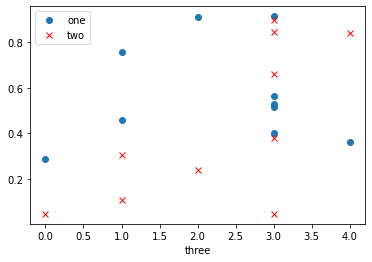

In [14]:
d = {'one' : np.random.rand(10),
     'two' : np.random.rand(10),
    'three': np.random.randint(0, high=5, size=10)}

df = pd.DataFrame(d).set_index('three')
df.plot(style=['o','rx'])
df

In [28]:
df['a1'] = list(range(10))
df

,one,two,a1
three,,,
3,0.913269,0.898082,0
2,0.911178,0.238735,1
3,0.527395,0.660684,2
1,0.460130,0.105484,3
1,0.756318,0.307081,4
3,0.515245,0.845360,5
0,0.288470,0.047118,6
4,0.362584,0.840739,7
3,0.562707,0.046621,8


In [31]:
df['a2'] = np.arange(10)

In [33]:
df['a1']

three
3    0
2    1
3    2
1    3
1    4
3    5
0    6
4    7
3    8
3    9
Name: a1, dtype: int32

In [40]:
df.sort_values(by='two')

,one,two,a1,a2
three,,,,
3,0.562707,0.046621,8,8
0,0.288470,0.047118,6,6
1,0.460130,0.105484,3,3
2,0.911178,0.238735,1,1
1,0.756318,0.307081,4,4
3,0.401766,0.381209,9,9
3,0.527395,0.660684,2,2
4,0.362584,0.840739,7,7
3,0.515245,0.845360,5,5


In [70]:
df.a1//1

three
3    0
2    1
3    2
1    3
1    4
3    5
0    6
4    7
3    8
3    9
Name: a1, dtype: int32

In [67]:
dfMean = df.groupby(df.index).mean()
dfStd = df.groupby(df.index).std(ddof=0)

,one,two,a1,a2
a1,,,,
0,0.783947,0.599167,1.0,1.0
1,0.577231,0.419308,4.0,4.0
2,0.404587,0.311492,7.0,7.0
3,0.401766,0.381209,9.0,9.0


### Strings & File Paths

In [18]:
fname = r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\04-2024\19 Apr 2024\Andor\Varied Evap t1 and Tau\0100000000spool.dat'

In [19]:
fname

'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\04-2024\\19 Apr 2024\\Andor\\Varied Evap t1 and Tau\\0100000000spool.dat'

In [40]:
fname.replace('\\', '/').split('/Andor')[0].rsplit('/',1)[-1]

'19 Apr 2024'

In [41]:
 datetime.datetime.strptime( fname.replace('\\', '/').split('/Andor')[0].rsplit('/',1)[-1], '%d %b %Y' )

datetime.datetime(2024, 4, 19, 0, 0)

In [44]:
 datetime.datetime.strptime( fname.replace('\\', '/').split('/Andor')[0].rsplit('/',1)[-1], '%d %b %Y' ).strftime('%m/%d/%Y')

'04/19/2024'

In [21]:
'/'.join(fname.replace('\\', '/').rsplit('/', 2)[1:])

'Varied Evap t1 and Tau/0100000000spool.dat'

In [8]:
fname.replace('\\', '/').rsplit('/', 4)


['D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/04-2024',
 '19 Apr 2024',
 'Andor',
 'Varied Evap t1 and Tau',
 '0100000000spool.dat']

In [83]:
folder1 = r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024/03-2024/09 Mar 2024\Andor/ODT 400 Misalign\7200000000spool.dat'

In [84]:
folder1

'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024/03-2024/09 Mar 2024\\Andor/ODT 400 Misalign\\7200000000spool.dat'

In [85]:
folder1.split('\\')

['D:',
 'Dropbox (Lehigh University)',
 'Sommer Lab Shared',
 'Data',
 '2024/03-2024/09 Mar 2024',
 'Andor/ODT 400 Misalign',
 '7200000000spool.dat']

In [86]:
[ii.split('/') for ii in folder1.split('\\')]

[['D:'],
 ['Dropbox (Lehigh University)'],
 ['Sommer Lab Shared'],
 ['Data'],
 ['2024', '03-2024', '09 Mar 2024'],
 ['Andor', 'ODT 400 Misalign'],
 ['7200000000spool.dat']]

In [88]:
folder1.replace('\\', '/').rsplit('/',4)

['D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/03-2024',
 '09 Mar 2024',
 'Andor',
 'ODT 400 Misalign',
 '7200000000spool.dat']

In [91]:
folder1.replace('\\', '/')

'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/03-2024/09 Mar 2024/Andor/ODT 400 Misalign/7200000000spool.dat'

In [103]:
folder1

'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024/03-2024/09 Mar 2024\\Andor/ODT 400 Misalign\\7200000000spool.dat'

In [106]:
paths = ('D:/Dropbox (Lehigh University)/Sommer Lab Shared\\Data/2024/03-2024/09 Mar 2024/Andor/ODT 400 Misalign/',
         'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/03-2024/09 Mar 2024/Andor/ODT 1900 Misalign/',
         'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/03-2024/10 Mar 2024/Andor/ODT 400 Misalign/')

In [108]:
dayfolders = [ ii.replace('\\', '/').rstrip('/').rsplit('/', 2)[0] for ii in paths]
dayfolders

['D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/03-2024/09 Mar 2024',
 'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/03-2024/09 Mar 2024',
 'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/03-2024/10 Mar 2024']

In [109]:
dayfolders = np.unique(dayfolders)

In [110]:
variablelogfolders = [ os.path.join(ii, 'Variable Logs') for ii in dayfolders]
variablelogfolders

['D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/03-2024/09 Mar 2024\\Variable Logs',
 'D:/Dropbox (Lehigh University)/Sommer Lab Shared/Data/2024/03-2024/10 Mar 2024\\Variable Logs']

In [ ]:
df

,A,B,C,D,E
ind,,,,,
a,"[[0, 1], [2, 3]]",1,2,3,4
b,"[[4, 5], [6, 7]]",6,7,8,9
c,"[[8, 9], [10, 11]]",11,12,13,14
d,"[[12, 13], [14, 15]]",16,17,18,19
e,"[[16, 17], [18, 19]]",21,22,23,24
f,"[[20, 21], [22, 23]]",26,27,28,29


In [ ]:
df.insert(0, 'insert2', 'asdf')

In [ ]:
df

,insert1,insert,A,B,C,D,E
ind,,,,,,,
a,qwer,asdf,"[[0, 1], [2, 3]]",1,2,3,4
b,qwer,asdf,"[[4, 5], [6, 7]]",6,7,8,9
c,qwer,asdf,"[[8, 9], [10, 11]]",11,12,13,14
d,qwer,asdf,"[[12, 13], [14, 15]]",16,17,18,19
e,qwer,asdf,"[[16, 17], [18, 19]]",21,22,23,24
f,qwer,asdf,"[[20, 21], [22, 23]]",26,27,28,29


In [ ]:
aa = df[['insert1', 'insert2']].apply(lambda row: os.path.join(*row), axis=1)
aa.values

array(['qwer\\asdf', 'qwer\\asdf', 'qwer\\asdf', 'qwer\\asdf',
       'qwer\\asdf', 'qwer\\asdf'], dtype=object)

In [81]:
aa = df[['path']].apply(lambda row: *row.split('\\') , axis=1)


SyntaxError: invalid syntax (Temp/ipykernel_15460/3592707975.py, line 1)

In [82]:
df['path'].str.split('\\', n=1, expand=True)


,0,1
ind,,
a,qwer,asdf
b,qwer,asdf
c,qwer,asdf
d,qwer,asdf
e,qwer,asdf
f,qwer,asdf


In [ ]:
folder = r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\03-2024\09 Mar 2024\Andor\ODT 1900 Misalign'

In [ ]:
files = os.listdir(folder)

In [ ]:
ctime = []
mtime = []
for file in files:
    path = os.path.join(folder, file)
    ctime.append(os.path.getctime(path))
    mtime.append(os.path.getmtime(path))

    

In [ ]:
os.path.join('asdf','qwer/adf')

'asdf\\qwer/adf'

In [ ]:
for ii, jj, kk in os.walk(folder):
    print(ii)
    print(jj)
    print(kk)

D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\03-2024\09 Mar 2024\Andor\ODT 1900 Misalign
['ModifiedData']
['0000000000spool.dat', '0010000000spool.dat', '0100000000spool.dat', '0110000000spool.dat', '0200000000spool.dat', '0210000000spool.dat', '0300000000spool.dat', '0310000000spool.dat', '0400000000spool.dat', '0410000000spool.dat', '0500000000spool.dat', '0600000000spool.dat', '0700000000spool.dat', '0800000000spool.dat', '0900000000spool.dat', '1000000000spool.dat', '1010000000spool.dat', '1100000000spool.dat', '1110000000spool.dat', '1200000000spool.dat', '1210000000spool.dat', '1300000000spool.dat', '1310000000spool.dat', '1400000000spool.dat', '1410000000spool.dat', '1500000000spool.dat', '1600000000spool.dat', '1700000000spool.dat', '1800000000spool.dat', '1900000000spool.dat', '2000000000spool.dat', '2010000000spool.dat', '2100000000spool.dat', '2110000000spool.dat', '2200000000spool.dat', '2210000000spool.dat', '2300000000spool.dat', '2310000000spool.dat', '2400

In [ ]:
folder

'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\03-2024\\09 Mar 2024\\Andor\\ODT 1900 Misalign'

In [ ]:
os.path.split(folder, 3)

TypeError: split() takes 1 positional argument but 2 were given

In [ ]:
folder.rsplit('\\', 3)

['D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\03-2024',
 '09 Mar 2024',
 'Andor',
 'ODT 1900 Misalign']

In [ ]:
os.path.split?

Signature: os.path.split(p)
Docstring:
Split a pathname.

Return tuple (head, tail) where tail is everything after the final slash.
Either part may be empty.
File:      c:\programdata\anaconda3\lib\ntpath.py
Type:      function


In [ ]:
os.sep

'\\'

In [ ]:
folder.rsplit(os.sep, 3)

['D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\03-2024',
 '09 Mar 2024',
 'Andor',
 'ODT 1900 Misalign']

In [ ]:
'/'.join(folder.rsplit('\\', 3)[-3:-1])

'09 Mar 2024/Andor'

### Others

In [133]:
aa = np.arange(81).reshape(3,3,3,3)

In [134]:
aa

array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]],


       [[[27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],

        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53]]],


       [[[54, 55, 56],
         [57, 58, 59],
         [60, 61, 62]],

        [[63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80]]]])

In [135]:
aa[1,1,:,:]

array([[36, 37, 38],
       [39, 40, 41],
       [42, 43, 44]])

In [138]:
aa[:,1,:,:]

array([[[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[36, 37, 38],
        [39, 40, 41],
        [42, 43, 44]],

       [[63, 64, 65],
        [66, 67, 68],
        [69, 70, 71]]])

In [168]:
aa[:,1]

array([[[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[36, 37, 38],
        [39, 40, 41],
        [42, 43, 44]],

       [[63, 64, 65],
        [66, 67, 68],
        [69, 70, 71]]])

In [144]:
aa[:,1,:,:].sum(axis = (1,2))

array([117, 360, 603])

In [145]:
np.sum(aa[:,1,:,:], axis=(1,2))

array([117, 360, 603])

In [127]:
aa | bb

array([ True,  True])

In [128]:
aa or bb

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [148]:
aa[:,1,:,:] == aa[:,1,:,:]

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]]])

In [151]:
(aa[:,1,:,:] == aa[:,1,:,:]).all()

True

In [156]:
aa[1,1,1,:]

array([39, 40, 41])

In [167]:
aa[1,1,1,:][ (np.array([4,5,6]) - np.array([6,5,4])) ]


array([40, 39, 41])

In [154]:
np.absolute(aa)

array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]],


       [[[27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],

        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53]]],


       [[[54, 55, 56],
         [57, 58, 59],
         [60, 61, 62]],

        [[63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80]]]])

In [6]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':

### Creat Catalogue

In [106]:
Folders = []
for root, dirs, files in os.walk(r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\05-2024'):
    # for name in files:
    #     print(os.path.join(root, name))
    for name in dirs:
        Folders.append(os.path.join(root, name))
        
Folders = [ii for ii in Folders if ('Andor\\' in ii) and ('ModifiedData' not in ii) ]
Folders

['D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\06 May 2024\\Andor\\Potential Modulation',
 'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\06 May 2024\\Andor\\Potential Modulation_1',
 'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\06 May 2024\\Andor\\Test',
 'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\07 May 2024\\Andor\\ODT 1900 Align',
 'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\07 May 2024\\Andor\\ODT 1900 Misalign',
 'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\07 May 2024\\Andor\\Potential Modulation',
 'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\07 May 2024\\Andor\\Potential Modulation ODT 1150',
 'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\07 May 2024\\Andor\\Potential Modulation ODT 400',
 'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\20

In [107]:
Folders4PPI = [ii for ii in Folders if 'PPI' not in ii]
Folders4PPI

['D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\06 May 2024\\Andor\\Potential Modulation',
 'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\06 May 2024\\Andor\\Potential Modulation_1',
 'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\06 May 2024\\Andor\\Test',
 'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\07 May 2024\\Andor\\ODT 1900 Align',
 'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\07 May 2024\\Andor\\ODT 1900 Misalign',
 'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\07 May 2024\\Andor\\Potential Modulation',
 'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\07 May 2024\\Andor\\Potential Modulation ODT 1150',
 'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\07 May 2024\\Andor\\Potential Modulation ODT 400',
 'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\20

In [108]:
D1Folder = [ii for ii in Folders if 'D1' in ii]
D1Folder

['D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\16 May 2024\\Andor\\D1 4150 Atom Number',
 'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\16 May 2024\\Andor\\D1 4900 Atom Number',
 'D:\\Dropbox (Lehigh University)\\Sommer Lab Shared\\Data\\2024\\05-2024\\16 May 2024\\Andor\\Test D1 4900']

In [115]:
# ImageAnalysisCode.BuildCatalogue(*D1Folder, picturesPerIteration=4, skipFirstImg=0);

In [114]:
# ImageAnalysisCode.BuildCatalogue(*Folders4PPI, picturesPerIteration=4, skipFirstImg=1);

In [1]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'x')

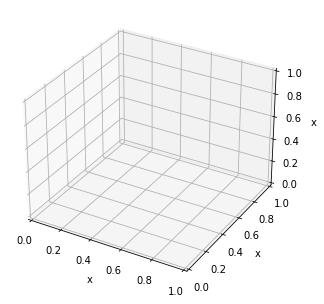

In [3]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, layout='constrained')
ax.set_xlabel('x')
ax.set_ylabel('x')
ax.set_zlabel('x')

In [28]:
import sys

In [30]:
sys.version

'3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:58:50) \n[GCC 10.3.0]'

In [ ]:
del